In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 모비율 검정 
p를 6이 나오는 확률이라고 하자. 에 대하여 
을 검정하기 위하여, 여러 개의 주사위를 던져 총 n=8000개의 관측치 중 1389개의 주사위 눈이 6인 결과를 얻었다. 유의수준 0.05 하에서 가설검정을 진행하라

In [2]:
p = 1/6 # 정해진 확률 
n = 8000 
p_hat = 1389 / 8000 


se = np.sqrt(p * (1-p) / n)
z_stat = (p_hat - p) / se 
print(z_stat)

## 기각역 
from scipy.stats import norm

z_critical = norm.ppf(1 - 0.05)
print(z_critical) # 1.65 를 구하는 식 

# P-value = 검정 통계량값의 누적 질량 함수 
print(1 - norm.cdf(abs(z_stat)))

1.6700000000000026
1.6448536269514722
0.04745968180294702


한 지역의 국회의원 선거여론조사를 지난달 실시한 결과 특정후보의 지지율이 60%이었다. 최근에 지지율에 변동이 있는지 알아보기 위해 100명을 단순임의추출하였더니 55명이 지지를 하였다. 특정후보에 대한 현재 지지율이 60%에서 변동이 있는지 유의수준 5%로 가설검정하라.

- H0 : 특정 후보에 대한 지지율이 60&이다. 
- H1 : 특정 후보에 대한 지지율이 60%이 아니다. 

In [3]:
p = 0.6 
n = 100 
p_hat = 55 / 100 

se = np.sqrt(p * (1- p) / n)
d = (p_hat - p)
z = d / se
print(z)

# 기각역 ppf 확률 분포 함수 
z_critical = norm.ppf(1 - 0.05)

#  p_value 
print(2 * (1 - norm.cdf(abs(z))))

-1.0206207261596563
0.30743416592739603


## 모비율 구간 추정
한 대학교에서 3월 한 달간 신입학생 325명을 대상으로 일주일에 1회 이하로 술을 마시는 사람을 조사해본 결과 25명이었다. 99% 신뢰수준에서 모비율을 추정하라.



/

In [4]:
n = 325 
p = 25 / 325 
conf = 0.01 

# 표준오차 
SE = np.sqrt(p * (1- p) / n)

# 기각역
conf_z = norm.ppf(1 - conf/2) #2.57
# 허용 오차 Za/2 * SE 
ME = conf_z * SE 

시중에서 판매되는 한 제품의 불량률을 추정하려고 한다. 900대의 제품을 랜덤하게 조사하였더니 불량률이 450대였다. 판매되는 제품되는 불량률에 대한 90% 신뢰구간을 구하여라.

In [5]:
n = 900 
p = 450 / 900 
conf = 0.1 

# 1) SE 
SE = np.sqrt(p * (1 -p) / n)

# 2) Z_crtical 
conf = norm.ppf(1- conf/2)

# 3) ME 
ME = conf * SE 
print(p - ME, p + ME)


### Libary 풀이 
from statsmodels.stats.proportion import proportion_confint 
count = 450
nobs = 900 

low, upper = proportion_confint(count, nobs, alpha = 0.1)
print(({low}, {upper}))

0.4725857728841421 0.5274142271158578
({0.4725857728841421}, {0.5274142271158578})


철강제품의 불량률을 조사하고자 한다. 이 때, 불량률의 90% 신뢰수준, 추정오차한계가 5% 이내가 되기 위하여 적절한 표본의 크기 중 최소값은 얼마인가 (ADP_26 기출)

In [6]:
conf = 0.1

Z = norm.ppf(1 - conf/2 ) # 1.644
p = 0.5 
# 추정 오차 한계
E = 0.05 

((Z**2 * p * (1 - p)) / E**2)

270.5543454095412

## 이표본 비율 검정 

1. 특정 후보의 지지율이 "성별"에 따른 차이가 있는가?
2. 두 대의 기계의 불량률이 서로 다른가? 

C사 생산 제품 1000개 중 양품이 600개, D사 생산 제품 500개 중 양품이 200개 이다. 두 회사의 양품률에 차이가 있는지 검정하여라.

- H1 : 두 회사의 양품율의 차이는 없다.
- H0 : 두 회사의 양품율의 차이는 있다.

In [7]:
## Solution 1) 
n1 = 1000 
p1 = 600 / 1000 

n2 = 500
p2 = 200 / 500 

# 차이 
d = p1 - p2

# 기각역 (양측검정)
Z = norm.ppf(1 - 0.05/2)

# 합동 분산 
pe = (n1 * p1 + n2 * p2) / (n1 + n2)

# SE 
se = np.sqrt( (pe * (1 - pe)) / n1 + (pe * (1 - pe)) / n2)

# 검정통계량 
z = d/se

# 유의 수준 : 검정 통계량의 확률 누적 함수 
p_val = 1 - norm.cdf(np.abs(z))
print('{:.3f}'.format(Z, z))
print('{:.3f}'.format(p_val))

1.960
0.000


In [8]:
## Solution 2) 
from scipy.stats import chi2_contingency
observed = [[600, 400], [200, 300]]

chi2, p_value, dof, expected = chi2_contingency(observed)
chi2, p_value, dof, expected

print(chi2)
print('p-value : {:.3f}'.format(p_value))

52.77087053571428
p-value : 0.000


금년도 대통령 선거에서 특정후보의 지지율에 대해 남녀별로 독립적으로 표본을 추출해 조사하였더니 남자 225명 중 54명이 지지를 하였고, 여자 175명 중 52명이 지지를 하였다. 남녀의 지지율에 차이가 있다고 할 수 있는지 유의수준 5％에서 검정

- H0 : 남녀 지지율 차이가 없다
- H1 : 남녀 지지율 차이가 있다. 

In [9]:
observed = [[54, 161], [52, 120]]

chi, p, d, ex = chi2_contingency(observed)
print(chi)
print(p)

print('귀무가설 기각' if p > 0.05 else '귀무가설채택')

1.0135915362922163
0.3140439528983863
귀무가설 기각


In [10]:
n1 = 161
p1 = 54 / 161

n2 = 52
p2 = 52 / 120 

alpha = 0.05

# 차이 
d = p1 - p2 

# 합동분산
pe = (p1 * n1 + p2 * n2) / (n1 + n2)
SE = np.sqrt((pe * (1 - pe)) / n1  + (pe * (1 - pe)) / n2)

z = d/SE

# 기각역 
z_critical = norm.ppf(1 - alpha / 2)

# 유의 수준
p_val = 1 - norm.cdf(np.abs(z))

print(z, p_val)
print('귀무가설 기각' if p > 0.05 else '귀무가설채택')

-1.2796164522064672 0.10034003040536987
귀무가설 기각


공구를 생산하는 어느 공장은 주간 생산조와 야간 생산조를 운영하고 있다. 
과 를 각각 주간 생산조와 야간 생산조가 생산한 공구의 불량률이라고하자. 각 생산조에 의해 생산된 공구를 무작위로 1000개씩 뽑아서  대를 검정하려고 한다. 주간 생산 공구와 야간 생산 공구로부터 각각 
개의 불량품들이 관측되었다. 유의수준 0.05하에서 가설을 검정

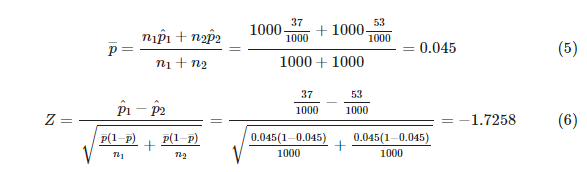

In [11]:
n1 = 1000 
p1 = 37 / 1000 

n2 = 1000
p2 = 53/ 1000 

alpha = 0.05 

# 차이 
d = p1 - p2 

# PE 
pe = (n1 * p1 + n2 * p2) / (n1 + n2)
SE = np.sqrt((pe * (1 -pe)) /n1 + (pe * (1 -pe)) /n2) 

z = d/ SE

# 기각역 
z_critical = norm.ppf(1 - alpha/ 2)

pm과 pf 를 각각 어느 새의 수컷과 암컷이 그들이 부화한 장소로 돌아오는 비율을 나타낸다고 하자. 894마리 수컷 중 124마리가 돌아왔고, 700마리 암컷 중 70마리가 돌아왔을 때 두 비율 차이에 대한 95% 신뢰구간을 구하여라.